<a href="https://colab.research.google.com/github/Kaavyagarg/Data_Analysis/blob/main/ML_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url='https://drive.google.com/file/d/1nPDoeQIjb9wggHdf8zVN04xki2AHBiVD/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
house_data = pd.read_csv(url)
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
house_data.shape

(1460, 81)

In [ ]:
# Using 75/25 ratio for train test split in this case

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(house_data.loc[:, house_data.columns != 'SalePrice'],
                                               house_data['SalePrice'],test_size=0.25,random_state=100)

X_train.shape, X_test.shape


((1095, 80), (365, 80))

In [ ]:
# Extracting a list of Categorical fields with missing values
features_with_missingval =[feature for feature in house_data.columns if house_data[feature].isnull().sum()>=1 and house_data[feature].dtypes=='O']
features_with_missingval


['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [ ]:
# Printing %s of missing values in all cateogrical features

for feature in features_with_missingval:
    print("{0}: {1}% missing values".format(feature,np.round(house_data[feature].isnull().mean()*100,2)))

house_data[features_with_missingval].isnull().sum()


Alley: 93.77% missing values
MasVnrType: 0.55% missing values
BsmtQual: 2.53% missing values
BsmtCond: 2.53% missing values
BsmtExposure: 2.6% missing values
BsmtFinType1: 2.53% missing values
BsmtFinType2: 2.6% missing values
Electrical: 0.07% missing values
FireplaceQu: 47.26% missing values
GarageType: 5.55% missing values
GarageFinish: 5.55% missing values
GarageQual: 5.55% missing values
GarageCond: 5.55% missing values
PoolQC: 99.52% missing values
Fence: 80.75% missing values
MiscFeature: 96.3% missing values


Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [ ]:

## Replacing missing values with a new label "Not avaialble"

def replace_missing_lables(df,features):
    dataset=df.copy()
    dataset[features]=dataset[features].fillna('Not Avaialable')
    return dataset

house_data=replace_missing_lables(house_data,features_with_missingval)

house_data[features_with_missingval].isnull().sum()  # Prints the final counts of nulls. We can confirm all to be 0

house_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Not Avaialable,Reg,Lvl,AllPub,...,0,Not Avaialable,Not Avaialable,Not Avaialable,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Not Avaialable,Reg,Lvl,AllPub,...,0,Not Avaialable,Not Avaialable,Not Avaialable,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Not Avaialable,IR1,Lvl,AllPub,...,0,Not Avaialable,Not Avaialable,Not Avaialable,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Not Avaialable,IR1,Lvl,AllPub,...,0,Not Avaialable,Not Avaialable,Not Avaialable,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Not Avaialable,IR1,Lvl,AllPub,...,0,Not Avaialable,Not Avaialable,Not Avaialable,0,12,2008,WD,Normal,250000


LotFrontage: 0.18% missing value
MasVnrArea: 0.01% missing value
GarageYrBlt: 0.06% missing value


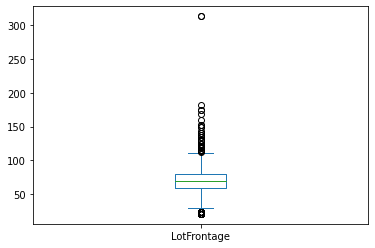

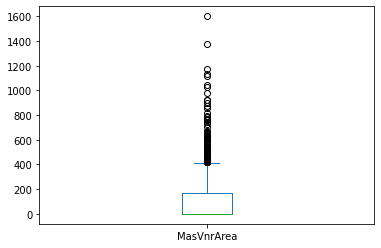

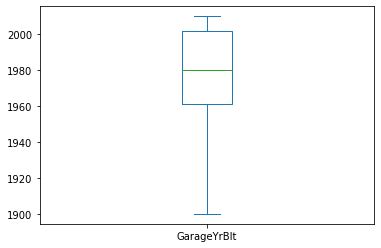

In [ ]:
"""##### Numerical Features"""

## Similarly, lets check for list of features with numerical values
## For numerical features dtype will not be 'O'

numerical_with_nan=[feature for feature in house_data.columns if house_data[feature].isnull().sum()>=1 and house_data[feature].dtypes!='O']

## Printing the the numerical variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(house_data[feature].isnull().mean(),2)))

import matplotlib.pyplot as plt
for col in numerical_with_nan:
  house_data[col].plot(kind = 'box')
  plt.show()


In [ ]:
## Imputing missing values with median

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    house_data[feature].fillna(house_data[feature].median(),inplace=True)

house_data[numerical_with_nan].isnull().sum()

print(house_data.shape)
house_data.head()

house_data.isnull().sum().sum()
#0 means nowhere missing values


(1460, 81)


0

In [ ]:
"""### Feature Extraction"""

## The below year-based features are not useful for any model
## Hence we can convert them into Duration by sbstracting from Year sold to determine age

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    house_data[feature]=house_data['YrSold']-house_data[feature]

"""We can see below how year based fetures have been converted to duration"""

house_data[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()


,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


In [ ]:
"""##### Handling Rare Categorical Labels inside Features

If a label is occupying less than 1% of the data in a feature, then we can remove that since that wont be adding any value to any model.

Drpping that label can improve the performance of a model.
"""

# Generating list of ctegorical variables
categories=[feature for feature in house_data.columns if house_data[feature].dtype=='O']

categories

house_data.RoofStyle.value_counts()

len(house_data)

ll1 = house_data.groupby('MSZoning')['SalePrice'].count()/len(house_data)
ll1[ll1>0.01].index


Index(['FV', 'RH', 'RL', 'RM'], dtype='object', name='MSZoning')

In [ ]:
# Below code snippet imputes all lables having less than 1% weightage in a data to "Insignificant Label'"

for feature in categories:

    label_percentage=house_data.groupby(feature)['SalePrice'].count()/len(house_data)
    label_more_than_1_percent =label_percentage[label_percentage>0.01].index
    house_data[feature]=np.where(house_data[feature].isin(label_more_than_1_percent),house_data[feature],'Insignificant Label')

house_data.groupby('MSZoning')['SalePrice'].count()/len(house_data)
#label_more_than_1_percent =label_percentage[label_percentage>0.01].index


MSZoning
FV                     0.044521
Insignificant Label    0.006849
RH                     0.010959
RL                     0.788356
RM                     0.149315
Name: SalePrice, dtype: float64

In [ ]:
"""We can confirm that 'Insignificant Label' is a part of categorical features as below - """

house_data.Street.unique()

array(['Pave', 'Insignificant Label'], dtype=object)

In [ ]:
"""### One-hot encoding

Since machine based algorythms can't understand words, we usually need to convert categorical features into binary ones.

It can be done using pd.dummies() function as below -
"""

dd1 = pd.DataFrame({'cat': ['A', 'A', 'A', 'B', 'C', 'B', 'C', 'A'],
                    'val': [12, 45, 78, 56, 89, 12, 56, 9]})
dd1

pd.get_dummies(dd1['cat'],drop_first=True)

house_data[categories[2]].value_counts()

categories_dummy = pd.DataFrame()
for category in categories:
    categories_dummy = pd.concat([categories_dummy,pd.get_dummies(house_data[category],drop_first=True)],axis=1)
categories_dummy.head()

categories_dummy.shape


(1460, 170)

In [ ]:
"""Once the dummies are created, insignifacnt lables can be dropped as below - """

categories_dummy.drop(['Insignificant Label','Not Avaialable'],axis=1,inplace=True)
categories_dummy


,RH,RL,RM,Pave,Pave,IR2,Reg,HLS,Low,Lvl,...,P,Y,GdWo,MnPrv,Shed,New,WD,Family,Normal,Partial
0,0,1,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,1,0
1,0,1,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,1,0
2,0,1,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
4,0,1,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,1,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,1,0
1456,0,1,0,1,0,0,1,0,0,1,...,0,1,0,1,0,0,1,0,1,0
1457,0,1,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,1,0,1,0
1458,0,1,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,1,0


In [ ]:
"""Before the dummies are merged with main data, all the categorical fields are dropped since those are no longer required"""

for feature in house_data.columns:
    if house_data[feature].dtypes=='O':
        house_data.drop([feature],axis=1,inplace=True) # inplace= true signifies that the actual object is modified by drop method
house_data


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,5,5,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,31,31,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,7,6,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,91,36,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,8,8,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,8,7,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,32,22,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,69,4,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,60,14,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [ ]:
"""Finally, dummies are merged with main data"""

house_data = pd.concat([house_data,categories_dummy],axis=1)
house_data

house_data.shape


(1460, 421)

In [ ]:
"""### Feature Scaling"""

## Always remember there way always be a chance of data leakage so we need to split the data first and then apply feature
## Scaling

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(house_data.loc[:, house_data.columns != 'SalePrice'],
                                               house_data['SalePrice'],test_size=0.25,random_state=100)

X_train.shape, X_test.shape



((1095, 166), (365, 166))

In [ ]:
"""Id is not a usefull feature and Saleprice is our target variable. Hence, those are removed from the data to be scaled"""

l1 = list(categories_dummy.columns)
l1.extend(['Id','SalePrice'])
features_to_be_scaled = [feature for feature in X_train.columns if feature not in l1]


In [ ]:
# since along with ID and sale price all the onehot encoded variables must be excluded in scaling

features_to_be_scaled

"""##### Normalisation Scaling"""

from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
X_train_normalised = scaler_minmax.fit_transform(X_train[features_to_be_scaled])
X_test_normalised = scaler_minmax.transform(X_test[features_to_be_scaled])

X_train_normalised

X_test_normalised

print("Min value of X_train is : "+str(X_train_normalised.min()))
print("Max value of X_train is : "+str(X_train_normalised.max()))
print("Min value of X_test is : "+str(X_test_normalised.min()))
print("Max value of X_test is : "+str(X_test_normalised.max()))


Min value of X_train is : 0.0
Max value of X_train is : 1.0000000000000002
Min value of X_test is : -0.5
Max value of X_test is : 1.2834224598930482


In [ ]:
"""##### Standardisation Scaling"""

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train_standardised =sc.fit_transform(X_train[features_to_be_scaled])
X_test_standardised =sc.transform(X_test[features_to_be_scaled])
#discuss important difference between transform and fit_transform

X_train_standardised

X_test_standardised

print("Mean of X_train is : "+str(X_train_standardised.mean()))
print("Standard Deviation of X_train is : "+str(X_train_standardised.std()))
print("Mean of X_test is : "+str(X_test_standardised.mean()))
print("Standard Deviation of X_test is : "+str(X_test_standardised.std()))


Mean of X_train is : 2.003448424690904e-15
Standard Deviation of X_train is : 0.9999999999999999
Mean of X_test is : -0.01263286504082514
Standard Deviation of X_test is : 1.0054572703595637


In [ ]:
# discuss why not exact 0,1  in X_test, reason is transform has been applied & not fit_transform

# transform the train and test set, and add on the Id and SalePrice variables
X_train = pd.DataFrame(X_train_normalised)

X_test = pd.DataFrame(X_test_normalised)

X_train

X_test


,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.000000,0.133562,0.035991,0.333333,0.625,0.264706,0.606557,0.00000,0.109142,0.000000,...,0.372355,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.363636,0.25
1,0.235294,0.232877,0.048354,0.666667,0.500,0.014706,0.049180,0.00000,0.000000,0.000000,...,0.398449,0.000000,0.133843,0.0,0.0,0.0,0.000000,0.0,0.636364,0.00
2,0.000000,0.143836,0.030732,0.666667,0.500,0.088235,0.196721,0.02375,0.000000,0.000000,...,0.283498,0.256709,0.040153,0.0,0.0,0.0,0.000000,0.0,0.454545,0.25
3,0.235294,0.198630,0.037136,0.666667,0.500,0.007353,0.032787,0.00000,0.000000,0.000000,...,0.450635,0.168028,0.101338,0.0,0.0,0.0,0.000000,0.0,0.272727,0.25
4,0.352941,0.188356,0.040104,0.555556,0.625,0.227941,0.524590,0.00000,0.092488,0.000000,...,0.252468,0.236873,0.000000,0.0,0.0,0.0,0.888889,0.0,0.545455,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.058824,0.133562,0.035836,0.444444,0.125,0.639706,0.950820,0.00000,0.000000,0.000000,...,0.238364,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.909091,0.25
361,1.000000,0.140411,0.041160,0.444444,0.750,0.500000,0.163934,0.00000,0.062190,0.122795,...,0.000000,0.163361,0.000000,0.0,0.0,0.0,0.000000,0.0,0.727273,0.50
362,0.000000,0.075342,0.057342,0.444444,0.500,0.080882,0.196721,0.00000,0.126860,0.000000,...,0.406206,0.261377,0.000000,0.0,0.0,0.0,0.000000,0.0,0.545455,0.00
363,0.000000,0.133562,0.027577,0.444444,0.875,0.419118,0.098361,0.00000,0.070517,0.101085,...,0.507757,0.226371,0.000000,0.0,0.0,0.0,0.000000,0.0,0.545455,0.25
